In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   

## 1. Explore venues

In [3]:
#import coordinations of each Kreis
df= pd.read_excel("https://www.dropbox.com/s/zdd0rwvyxkco756/ZurichKreis.xlsx?dl=1",sheet_name='Sheet1')
kreis_col = df['Kreis']
df.set_index('Kreis',inplace=True)
df

,Latitude,Longitude
Kreis,,
Kreis 1,47.37055,8.54177
Kreis 2,47.33756,8.52110
Kreis 3,47.35785,8.50296
Kreis 4,47.37767,8.52856
Kreis 5,47.38767,8.52152
Kreis 6,47.39223,8.54381
Kreis 7,47.37328,8.58038
Kreis 8,47.35480,8.56097
Kreis 9,47.38245,8.47993


In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Kreis', 
                  'Kreis Latitude', 
                  'Kreis Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
#get venues of each Kreis
zurich_venues = getNearbyVenues(names = kreis_col, latitudes = df['Latitude'], longitudes = df['Longitude'])
zurich_venues

Kreis 1
Kreis 2
Kreis 3
Kreis 4
Kreis 5
Kreis 6
Kreis 7
Kreis 8
Kreis 9
Kreis 10
Kreis 11
Kreis 12


,Kreis,Kreis Latitude,Kreis Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kreis 1,47.37055,8.54177,Old Crow,47.372092,8.541024,Cocktail Bar
1,Kreis 1,47.37055,8.54177,Café Schober,47.371400,8.544149,Café
2,Kreis 1,47.37055,8.54177,Sprüngli,47.369398,8.539486,Dessert Shop
3,Kreis 1,47.37055,8.54177,Schwarzenbach Kolonialwaren,47.371444,8.544091,Gourmet Shop
4,Kreis 1,47.37055,8.54177,Zeughauskeller,47.370250,8.539828,Swiss Restaurant
5,Kreis 1,47.37055,8.54177,Café Milchbar,47.369193,8.540106,Café
6,Kreis 1,47.37055,8.54177,Ban Song Thai,47.369467,8.544068,Thai Restaurant
7,Kreis 1,47.37055,8.54177,Bindella,47.370618,8.540610,Italian Restaurant
8,Kreis 1,47.37055,8.54177,Fitnesspark Münstergasse,47.370888,8.544999,Gym / Fitness Center
9,Kreis 1,47.37055,8.54177,Widder Bar,47.372415,8.539863,Hotel Bar


In [7]:
#collect all the asian restaurants in each Kreis
df1 = zurich_venues[zurich_venues['Venue Category'].str.contains("Chinese")]
df2 = zurich_venues[zurich_venues['Venue Category'].str.contains("Asian")]
df3 = zurich_venues[zurich_venues['Venue Category'].str.contains("Thai")]
df4 = zurich_venues[zurich_venues['Venue Category'].str.contains("Vietnamese")]
df5 = zurich_venues[zurich_venues['Venue Category'].str.contains("Japanese")]
df6 = zurich_venues[zurich_venues['Venue Category'].str.contains("Tibetan")]
df7 = zurich_venues[zurich_venues['Venue Category'].str.contains("Indonesisch")]
#total_restaurant = zurich_venues[zurich_venues['Venue Category'].str.contains("Restaurant")]
venues_asian = pd.concat([df1, df2, df3, df4, df5, df6,df7])
#total_restaurant
venues_asian

,Kreis,Kreis Latitude,Kreis Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
117,Kreis 4,47.37767,8.52856,Ach'ii,47.376921,8.528732,Chinese Restaurant
120,Kreis 4,47.37767,8.52856,Hongxi,47.377823,8.529718,Chinese Restaurant
141,Kreis 4,47.37767,8.52856,Khujug,47.379851,8.527142,Chinese Restaurant
161,Kreis 4,47.37767,8.52856,Phuket Asia Center,47.380210,8.526542,Asian Restaurant
253,Kreis 5,47.38767,8.52152,Nooch,47.388770,8.521263,Asian Restaurant
284,Kreis 5,47.38767,8.52152,Ly's Asia,47.386159,8.517028,Asian Restaurant
6,Kreis 1,47.37055,8.54177,Ban Song Thai,47.369467,8.544068,Thai Restaurant
61,Kreis 1,47.37055,8.54177,Blue Monkey,47.372780,8.543275,Thai Restaurant
113,Kreis 4,47.37767,8.52856,Ah-Hua II,47.376234,8.527757,Thai Restaurant
114,Kreis 4,47.37767,8.52856,Ah Hua,47.377070,8.528342,Thai Restaurant


In [54]:
#reorganize and create the table of asian restaurants in each Kreis
asian_rest = venues_asian.groupby('Kreis').count()
asian_restaurant = pd.DataFrame(asian_rest["Venue"])
asian_restaurant.rename(columns={'Venue':'Asian Restaurant'},inplace = True)
reorderlist =['Kreis 1','Kreis 2','Kreis 3','Kreis 4','Kreis 5','Kreis 6','Kreis 7','Kreis 8','Kreis 9','Kreis 10','Kreis 11','Kreis 12']
asian_restaurant = asian_restaurant.reindex(reorderlist,fill_value = 0)
asian_restaurant

,Asian Restaurant
Kreis,
Kreis 1,2
Kreis 2,0
Kreis 3,0
Kreis 4,12
Kreis 5,4
Kreis 6,0
Kreis 7,0
Kreis 8,0
Kreis 9,0


### More exploration: Get top 10 venues

In [9]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
# one hot encoding
zurich_onehot = pd.get_dummies(zurich_venues[['Venue Category']], prefix="", prefix_sep="")

# add Kries column back to dataframe
zurich_onehot['Kreis'] = zurich_venues['Kreis'] 

# move Kreis column to the first column
fixed_columns = [zurich_onehot.columns[-1]] + list(zurich_onehot.columns[:-1])
zurich_onehot = zurich_onehot[fixed_columns]

# group rows by Kreis and by taking the mean of the frequency of occurrence of each category
zurich_grouped = zurich_onehot.groupby('Kreis').mean().reset_index()

# create columns according to number of top venues
columns = ['Kreis']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
kreis_venues_sorted = pd.DataFrame(columns=columns)
kreis_venues_sorted['Kreis'] = zurich_grouped['Kreis']

for ind in np.arange(zurich_grouped.shape[0]):
    kreis_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zurich_grouped.iloc[ind, :], num_top_venues)

kreis_venues_sorted

,Kreis,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kreis 1,Swiss Restaurant,Café,Restaurant,Boutique,Cocktail Bar,Plaza,Hotel,French Restaurant,Bar,Italian Restaurant
1,Kreis 10,Tram Station,Bar,Soccer Field,Bus Station,Wine Shop,French Restaurant,Diner,Eastern European Restaurant,Electronics Store,Falafel Restaurant
2,Kreis 11,Farm,Bus Station,Swiss Restaurant,Forest,Wine Shop,Furniture / Home Store,Diner,Eastern European Restaurant,Electronics Store,Falafel Restaurant
3,Kreis 12,Tram Station,Plaza,Supermarket,Restaurant,Light Rail Station,Café,Shopping Mall,Swiss Restaurant,Bus Station,Thai Restaurant
4,Kreis 2,Convenience Store,Light Rail Station,Bakery,Restaurant,Wine Shop,French Restaurant,Diner,Eastern European Restaurant,Electronics Store,Falafel Restaurant
5,Kreis 3,Tennis Court,Café,Bus Station,Supermarket,Wine Shop,French Restaurant,Diner,Eastern European Restaurant,Electronics Store,Falafel Restaurant
6,Kreis 4,Bar,Italian Restaurant,Japanese Restaurant,Swiss Restaurant,Nightclub,Mediterranean Restaurant,Café,Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant
7,Kreis 5,Nightclub,Restaurant,Bar,Café,Bakery,Hotel,Plaza,Pizza Place,Italian Restaurant,Falafel Restaurant
8,Kreis 6,Italian Restaurant,Bakery,Indian Restaurant,Supermarket,Park,Coffee Shop,Falafel Restaurant,Scenic Lookout,Food & Drink Shop,Middle Eastern Restaurant
9,Kreis 7,Pool,Golf Course,Music Venue,Tram Station,Swiss Restaurant,Scenic Lookout,Skating Rink,Fast Food Restaurant,Farm,Electronics Store


## 2. Data of Residents

In [15]:
#Foreign residents at each Kreis in 2018
zurich_bev = pd.read_excel("https://www.dropbox.com/s/58td1o6nl5u7jjd/BEV321T3211_Auslaenderanteil_Bevoelkerung_nach-Herkunft-Stadtkreis-Stadtquartier.xlsx?dl=1",sheet_name='2018',skiprows = 8)
aus_bev = zurich_bev[zurich_bev['Unnamed: 0'].str.contains("Kreis")]
aus_bev.rename(columns={"Unnamed: 0":"Kreis", "Anteil\nausländische Bevölkerung\n(%)":"Foreigner Percentage(%)"},inplace = True)
aus_bev.set_index('Kreis',drop = True, inplace=True)
aus_bev

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Total,Schweizer/-innen,Ausländer/-innen,Foreigner Percentage(%)
Kreis,,,,
Kreis 1,5750,3992,1758,30.6
Kreis 2,34877,23716,11161,32.0
Kreis 3,50569,35548,15021,29.7
Kreis 4,28729,18110,10619,37.0
Kreis 5,15579,10556,5023,32.2
Kreis 6,34321,24542,9779,28.5
Kreis 7,38191,27350,10841,28.4
Kreis 8,16788,10729,6059,36.1
Kreis 9,55765,37723,18042,32.4


In [16]:
#Asian residents at each Kreis in 2018
nation_bev = pd.read_excel("https://www.dropbox.com/s/lcuyg4xghwemm1i/BEV336T3360_Bevoelkerung_nach-Nationalitaet-Stadtkreis-Stadtquartier.xlsx?dl=1",sheet_name='2018',skiprows = 8)
nationalitat = nation_bev[nation_bev['Unnamed: 0'].str.contains("Kreis")]
kreis = nationalitat['Unnamed: 0']
asian = nationalitat['China']+nationalitat['Thailand']+nationalitat['Japan']+nationalitat['Südkorea']+nationalitat['Vietnam']+nationalitat['Indonesien']+nationalitat['Chinesisches Taipei']+nationalitat['Singapur']
asian_tot = pd.concat([kreis,asian],axis = 1)
asian_percentage =100* asian_tot[0]/nationalitat["Total"]
asian_percent = pd.concat([kreis,asian_percentage],axis = 1)
asian_percent.rename(columns={"Unnamed: 0":"Kreis",0:"Asian Resident Percentage(%)"},inplace = True)
asian_percent.set_index('Kreis',drop = True, inplace=True)
asian_percent.update(df)
asian_percent

,Asian Resident Percentage(%)
Kreis,
Kreis 1,1.008696
Kreis 2,0.785618
Kreis 3,0.632799
Kreis 4,1.019875
Kreis 5,0.699660
Kreis 6,0.897410
Kreis 7,0.882407
Kreis 8,0.941148
Kreis 9,0.869721


In [18]:
#mean income at each Kreis in 2015
zurich_income= pd.read_excel("https://www.dropbox.com/s/heqd8hvsllcvt5t/WIR100T1002_Steuerbares-Einkommen_nach-Steuertarif-Stadtkreis-Stadtquartier.xlsx?dl=1",sheet_name='2015',skiprows = 9)
kreis_income = zurich_income[zurich_income['Unnamed: 0'].str.contains("Kreis")]
kreis = kreis_income['Unnamed: 0']
income = pd.concat([kreis,kreis_income['Median']],axis = 1)
income.rename(columns={"Unnamed: 0":"Kreis",'Median':"Mean Income (1000CHF)"},inplace = True)
income.set_index('Kreis',drop = True, inplace=True)
income

,Mean Income (1000CHF)
Kreis,
Kreis 1,45.20
Kreis 2,45.00
Kreis 3,43.00
Kreis 4,38.30
Kreis 5,49.20
Kreis 6,46.20
Kreis 7,49.00
Kreis 8,52.55
Kreis 9,40.70


In [20]:
#rental at each Kreis
zurich_rental= pd.read_excel('https://www.dropbox.com/s/j9xh217ksm4o3jc/Nettomietpreise_nach-Kreis-Wohnungsgroesse-Eigentumsgruppe.xlsx?dl=1',sheet_name='T_1',skiprows = 8)
zurich_rental.drop(0,inplace = True) #Drop the first row 
zurich_rental.drop(1,inplace = True) #Drop the row of "Ganze Stadt" (whole city)
zurich_rental.rename(columns={'Unnamed: 0':'Kreis',"Pro Quadratmeter":"Monthly Rent (CHF/m2)"},inplace = True)
zurich_rental.set_index('Kreis',drop = True, inplace=True)
zurich_rental = zurich_rental.astype(float)
zurich_rental

,2-Zimmer,Unnamed: 2,3-Zimmer,Unnamed: 4,4-Zimmer,Unnamed: 6,Monthly Rent (CHF/m2),Unnamed: 8
Kreis,,,,,,,,
Kreis 1,1000.0,1760.0,1457.0,2075.0,1440.0,2250.0,17.88,28.95
Kreis 2,850.0,1386.0,1050.0,1652.0,1300.0,2100.0,15.60,22.76
Kreis 3,886.0,1400.0,963.0,1600.0,1375.0,2180.0,14.91,23.33
Kreis 4,899.0,1380.0,943.0,1550.0,1307.0,1860.0,14.72,23.39
Kreis 5,820.0,1550.0,974.0,1801.0,1350.0,2120.0,14.89,24.21
Kreis 6,870.0,1450.0,1000.0,1655.0,1357.0,2100.0,15.44,23.56
Kreis 7,1010.0,1430.0,1186.0,1750.0,1400.0,2198.0,15.38,22.96
Kreis 8,1010.0,1600.0,1166.0,1785.0,1429.0,2120.0,16.05,25.00
Kreis 9,950.0,1305.0,1000.0,1521.0,1400.0,1970.0,15.36,21.62


In [28]:
#create the data frame used for scatter plots
df_scatter = pd.concat([asian_percent,asian_restaurant["Asian Restaurant"],aus_bev['Foreigner Percentage(%)'],income['Mean Income (1000CHF)'],zurich_rental["Monthly Rent (CHF/m2)"]],axis = 1)
df_scatter.reset_index(drop=False,inplace=True)
df_scatter

,Kreis,Asian Resident Percentage(%),Asian Restaurant,Foreigner Percentage(%),Mean Income (1000CHF),Monthly Rent (CHF/m2)
0,Kreis 1,1.008696,2,30.6,45.20,17.88
1,Kreis 2,0.785618,0,32.0,45.00,15.60
2,Kreis 3,0.632799,0,29.7,43.00,14.91
3,Kreis 4,1.019875,12,37.0,38.30,14.72
4,Kreis 5,0.699660,4,32.2,49.20,14.89
5,Kreis 6,0.897410,0,28.5,46.20,15.44
6,Kreis 7,0.882407,0,28.4,49.00,15.38
7,Kreis 8,0.941148,0,36.1,52.55,16.05
8,Kreis 9,0.869721,0,32.4,40.70,15.36
9,Kreis 10,1.038646,0,26.4,46.00,15.89


(0, 15)

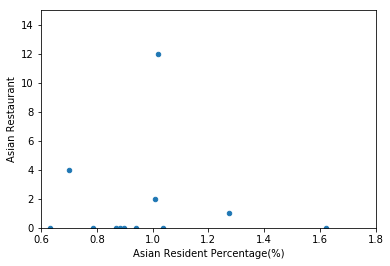

In [49]:
#plot the relationship between asian restaurants and asian residents
ax1=df_scatter.plot(kind = 'scatter', x='Asian Resident Percentage(%)',y='Asian Restaurant')#,c=df_scatter.index,colormap='viridis')

# Set the x & y scale because otherwise it goes into weird negative numbers
ax1.set_xlim((0.6,1.8))
ax1.set_ylim((0,15))

# Set the x, y-axis label
#ax1.set_xlabel("Asian Resident Percentage(%)")
#ax1.set_ylabel("Asian Restaurant")

(0, 15)

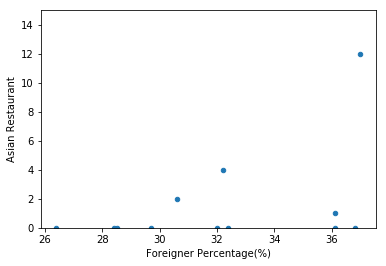

In [50]:
#plot the relationship between asian restaurants and foreign residents
ax2 = df_scatter.plot.scatter(x='Foreigner Percentage(%)',y='Asian Restaurant')#,c=df_scatter.index,colormap='viridis')
# Set the y scale because otherwise it goes into weird negative numbers
ax2.set_ylim((0,15))

(0, 15)

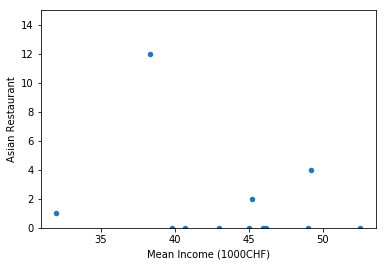

In [51]:
#plot the relationship between asian restaurants and mean income
ax3 = df_scatter.plot.scatter(x='Mean Income (1000CHF)',y='Asian Restaurant')#,c=df_scatter.index,colormap='viridis')
ax3.set_ylim((0,15))

(0, 15)

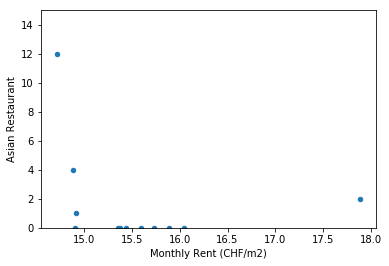

In [53]:
#plot the relationship between asian restaurants and monthly rent
ax4 = df_scatter.plot.scatter(x="Monthly Rent (CHF/m2)",y='Asian Restaurant')#,c=df_scatter.index,colormap='viridis')
ax4.set_ylim((0,15))

In [164]:
# import sckitlearn library
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [166]:

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scatter['Mean Income (1000CHF)'], df_scatter['Asian Restaurant'], test_size=0.33, random_state=42)


In [168]:
X = pd.DataFrame(df_scatter['Mean Income (1000CHF)'])
y = pd.DataFrame(df_scatter['Asian Restaurant'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)


# Plot outputs
#plt.scatter(X_test.reshape(1, -1), y_test.reshape(1, -1),  color='black')
#plt.plot(X_test.reshape(1, -1), y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

[-0.82720090349402631, 0.0, -0.71814325504318299]
